In [81]:
import numpy as ny
import pandas as pn
import matplotlib.pyplot as plt
import seaborn as sb

In [82]:
my=pn.read_csv('fish.csv')

In [83]:
my.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [84]:
my.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [85]:
my.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<AxesSubplot:>

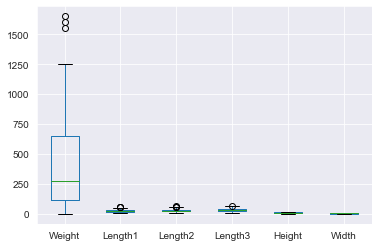

In [86]:
my.boxplot()

In [87]:
my=my[~(my['Weight']>1500)]

<AxesSubplot:>

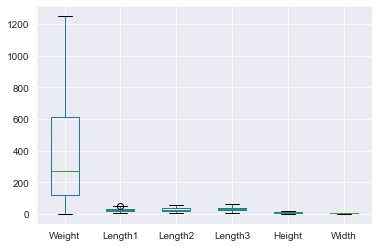

In [88]:
my.boxplot()

In [89]:
my=my[~(my['Length1']>50)]

<AxesSubplot:>

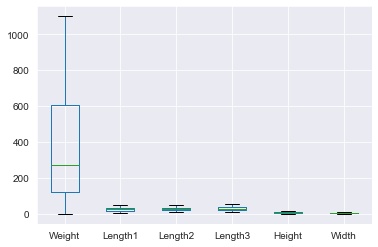

In [90]:
my.boxplot()

In [91]:
my['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Smelt        14
Pike         13
Parkki       11
Whitefish     6
Name: Species, dtype: int64

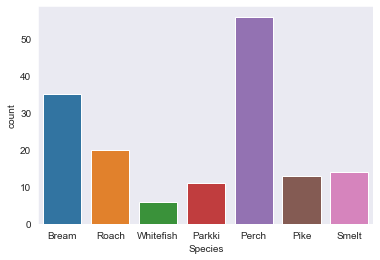

In [92]:
plt.figure()
sb.countplot(my['Species'])
plt.show()

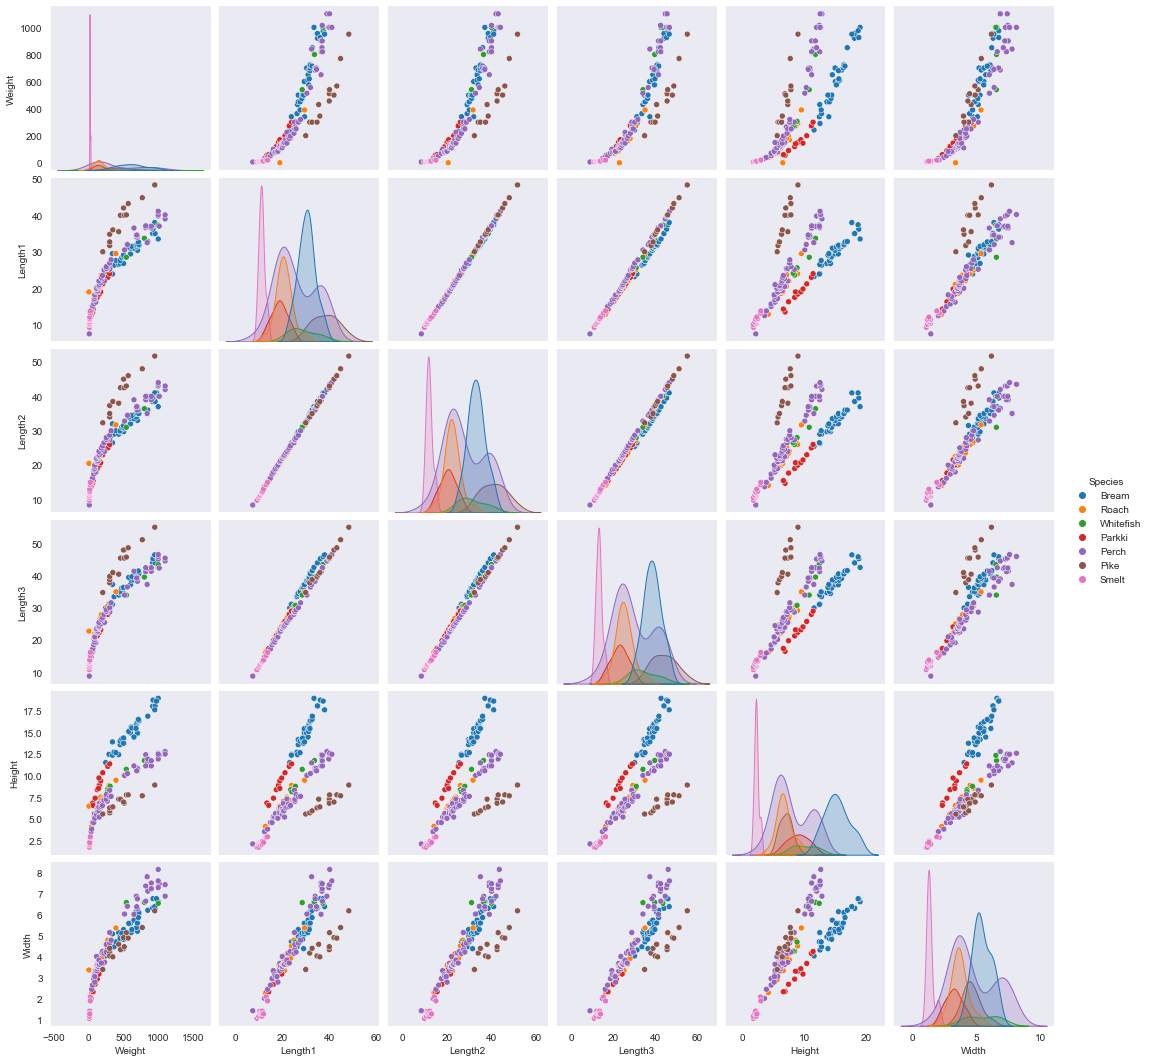

In [93]:
sb.pairplot(my, hue='Species')

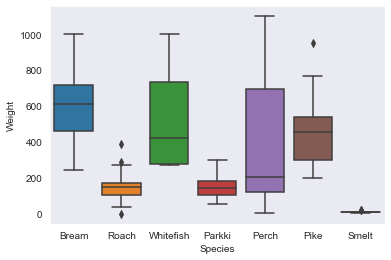

In [94]:
plt.figure()
sb.boxplot(x='Species',y='Weight',data=my)
plt.show()

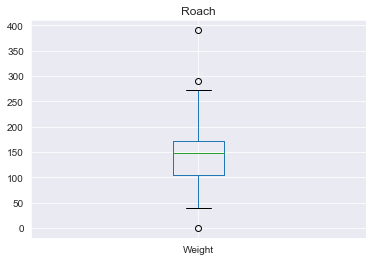

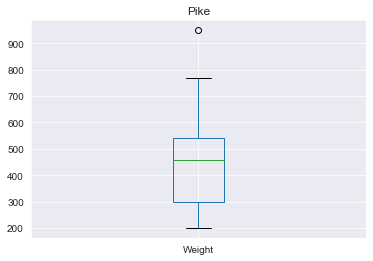

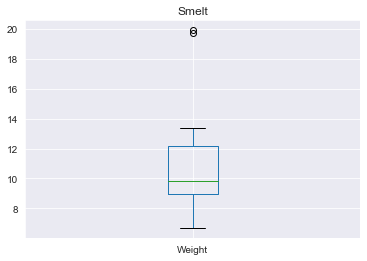

In [95]:
outliers=['Roach','Pike','Smelt']

for Species in outliers:
    plt.title(Species)
    my[(my.Species==Species)].boxplot("Weight")
    plt.show()

In [106]:
(my[(my.Species=='Roach')].Weight>250)

35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
53     True
Name: Weight, dtype: bool

In [107]:
my.drop(53, inplace=True)


In [108]:
(my[(my.Species=='Roach')].Weight<50)

35     True
36    False
37    False
38    False
39    False
40     True
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
Name: Weight, dtype: bool

In [109]:
my.drop(35, inplace=True)
my.drop(40, inplace=True)

In [111]:
(my[(my.Species=='Pike')].Weight>800)

128    False
129    False
130    False
131    False
132    False
133    False
134    False
135    False
136    False
137    False
138    False
139    False
140     True
Name: Weight, dtype: bool

In [112]:
my.drop(140, inplace=True)

In [113]:
(my[(my.Species=='Smelt')].Weight>18)

145    False
146    False
147    False
148    False
149    False
150    False
151    False
152    False
153    False
154    False
155    False
156    False
157     True
158     True
Name: Weight, dtype: bool

In [114]:
my.drop(157, inplace=True)
my.drop(158, inplace=True)

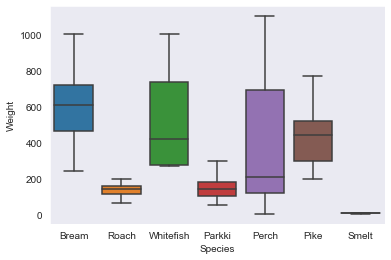

In [115]:
plt.figure()
sb.boxplot(x='Species',y='Weight',data=my)
plt.show()

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [119]:
my_fish=pn.get_dummies(my,columns=['Species'])
my_fish

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,9.9,11.3,11.8,13.1,2.2139,1.1659,0,0,0,0,0,1,0
153,9.8,11.4,12.0,13.2,2.2044,1.1484,0,0,0,0,0,1,0
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,0,1,0


In [121]:
x=my_fish.iloc[:,1:13].values
y=my_fish['Weight'].values

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [123]:
reggr=LinearRegression()
reggr.fit(x_train,y_train)

LinearRegression()

In [124]:
scr=reggr.score(x_train,y_train)
print("Prediction:",scr)

Prediction: 0.9478671590452975


In [128]:
dat=reggr.predict(x_test)


In [132]:
predict_data={"y_test":y_test,"predict":dat,"diff":abs(y_test-dat)}
pn.DataFrame(data=predict_data).head(10)

,y_test,predict,diff
0,650.0,738.553087,88.553087
1,600.0,619.240272,19.240272
2,690.0,707.213117,17.213117
3,1100.0,896.454924,203.545076
4,500.0,514.690620,14.690620
5,7.5,-9.573590,17.073590
6,300.0,291.106660,8.893340
7,1000.0,950.880034,49.119966
8,169.0,209.940525,40.940525
9,500.0,533.205832,33.205832
